# Medical Insurance Charges Analysis

## Project Overview

This project provides a comprehensive analysis of medical insurance charges using machine learning regression techniques. The dataset contains individual insurance records with demographic and health-related features including age, gender, BMI, number of children, smoking status, and geographic region.

## Objectives

1. **Data Preparation**: Clean and preprocess the dataset to handle missing values and ensure data quality
2. **Exploratory Data Analysis**: Investigate patterns, correlations, and key drivers of insurance charges
3. **Model Development**: Build and compare multiple regression models (Simple Linear, Multiple Linear, Ridge)
4. **Model Refinement**: Optimize model performance using regularization techniques and polynomial features
5. **Insights Generation**: Identify the primary factors influencing insurance costs

## Expected Outcomes

By leveraging data-driven modeling approaches, this analysis aims to:
- Provide actionable insights into cost-driving factors for insurance providers
- Develop accurate predictive models for estimating insurance charges
- Demonstrate best practices in regression analysis and model evaluation

## 1. Setup and Data Loading

### 1.1 Import Required Libraries

In [1]:
# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning - preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine learning - models
from sklearn.linear_model import LinearRegression, Ridge

# Machine learning - evaluation and validation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split

# Configuration for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

### 1.2 Load Dataset

In [2]:
import requests

# Download dataset from IBM Cloud Object Storage
DATA_URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv"
FILE_PATH = "insurance.csv"

try:
    response = requests.get(DATA_URL, timeout=10)
    response.raise_for_status()  # Raise exception for bad status codes
    
    with open(FILE_PATH, "wb") as file:
        file.write(response.content)
    
    print(f"✓ Dataset downloaded successfully: {FILE_PATH}")
except Exception as e:
    print(f"✗ Error downloading dataset: {e}")

# Load dataset into DataFrame
df = pd.read_csv(FILE_PATH)

✓ Dataset downloaded successfully: insurance.csv


In [3]:
# Define descriptive column names
COLUMN_NAMES = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = COLUMN_NAMES

print("Dataset Preview:")
print(df.head())

Dataset Preview:
  age  gender    bmi  no_of_children smoker  region   charges
0  18       2  33.77               1      0       4   1725.55
1  28       2  33.00               3      0       4   4449.46
2  33       2  22.70               0      0       1  21984.47
3  32       2  28.88               0      0       1   3866.86
4  31       1  25.74               0      ?       4   3756.62


In [4]:
# Replace placeholder '?' with NaN for proper missing value handling
df.replace('?', np.nan, inplace=True)

## 2. Data Wrangling and Preprocessing

### 2.1 Initial Data Assessment

In [5]:
print("Dataset Information:")
print(df.info())
print(f"\n{'='*50}")
print(f"Total Records: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None

Total Records: 2771
Total Features: 7

Missing Values:
age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64


### 2.2 Handle Missing Values

In [6]:
# Handle categorical feature: 'smoker' - impute with mode (most frequent value)
if df['smoker'].isnull().any():
    most_frequent_smoker_status = df['smoker'].value_counts().idxmax()
    df['smoker'].fillna(most_frequent_smoker_status, inplace=True)
    print(f"✓ Imputed missing 'smoker' values with mode: {most_frequent_smoker_status}")

# Handle numerical feature: 'age' - impute with mean
if df['age'].isnull().any():
    mean_age = df['age'].astype('float').mean()
    df['age'].fillna(mean_age, inplace=True)
    print(f"✓ Imputed missing 'age' values with mean: {mean_age:.2f}")

# Convert data types to appropriate formats
df['age'] = df['age'].astype('int')
df['smoker'] = df['smoker'].astype('int')

print(f"\n{'='*50}")
print("Data types after preprocessing:")
print(df.dtypes)
print(f"\nRemaining missing values:\n{df.isnull().sum()}")

✓ Imputed missing 'smoker' values with mode: 0
✓ Imputed missing 'age' values with mean: 39.12

Data types after preprocessing:
age                 int32
gender              int64
bmi               float64
no_of_children      int64
smoker              int32
region              int64
charges           float64
dtype: object

Remaining missing values:
age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64


C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\2382498750.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].fillna(most_frequent_smoker_status, inplace=True)
C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\2382498750.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [7]:
# Round charges to 2 decimal places for consistency
df['charges'] = np.round(df['charges'], 2)

print("Cleaned Dataset Preview:")
print(df.head(10))

Cleaned Dataset Preview:
   age  gender    bmi  no_of_children  smoker  region   charges
0   18       2  33.77               1       0       4   1725.55
1   28       2  33.00               3       0       4   4449.46
2   33       2  22.70               0       0       1  21984.47
3   32       2  28.88               0       0       1   3866.86
4   31       1  25.74               0       0       4   3756.62
5   46       1  33.44               1       0       4   8240.59
6   37       1  27.74               3       0       1   7281.51
7   37       2  29.83               2       0       2   6406.41
8   60       1  25.84               0       0       1  28923.14
9   25       2  26.22               0       0       2   2721.32


## 3. Exploratory Data Analysis (EDA)

### 3.1 Descriptive Statistics

In [8]:
# Summary statistics for numerical features
print("Numerical Features - Descriptive Statistics:")
print(df.describe().T)

Numerical Features - Descriptive Statistics:
                 count      mean       std      min      25%     50%  \
age             2771.0     39.12     14.08    18.00    26.00    39.0   
gender          2771.0      1.51      0.50     1.00     1.00     2.0   
bmi             2771.0     30.70      6.13    15.96    26.22    30.5   
no_of_children  2771.0      1.10      1.21     0.00     0.00     1.0   
smoker          2771.0      0.20      0.40     0.00     0.00     0.0   
region          2771.0      2.56      1.13     1.00     2.00     3.0   
charges         2771.0  13260.06  12153.77  1121.87  4687.80  9304.7   

                     75%       max  
age                51.00     64.00  
gender              2.00      2.00  
bmi                34.77     53.13  
no_of_children      2.00      5.00  
smoker              0.00      1.00  
region              4.00      4.00  
charges         16516.74  63770.43  


In [9]:
# Frequency distribution for categorical features
print("Categorical Features - Value Counts:")
print(f"\nGender Distribution:\n{df['gender'].value_counts()}")
print(f"\nSmoker Status Distribution:\n{df['smoker'].value_counts()}")
print(f"\nRegion Distribution:\n{df['region'].value_counts()}")

Categorical Features - Value Counts:

Gender Distribution:
gender
2    1406
1    1365
Name: count, dtype: int64

Smoker Status Distribution:
smoker
0    2208
1     563
Name: count, dtype: int64

Region Distribution:
region
4    766
3    683
1    664
2    658
Name: count, dtype: int64


### 3.2 Distribution Analysis

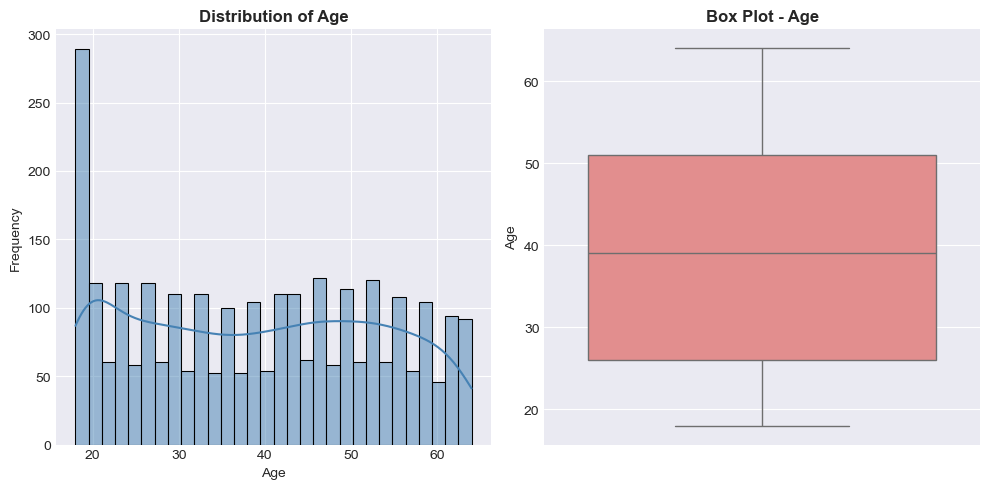

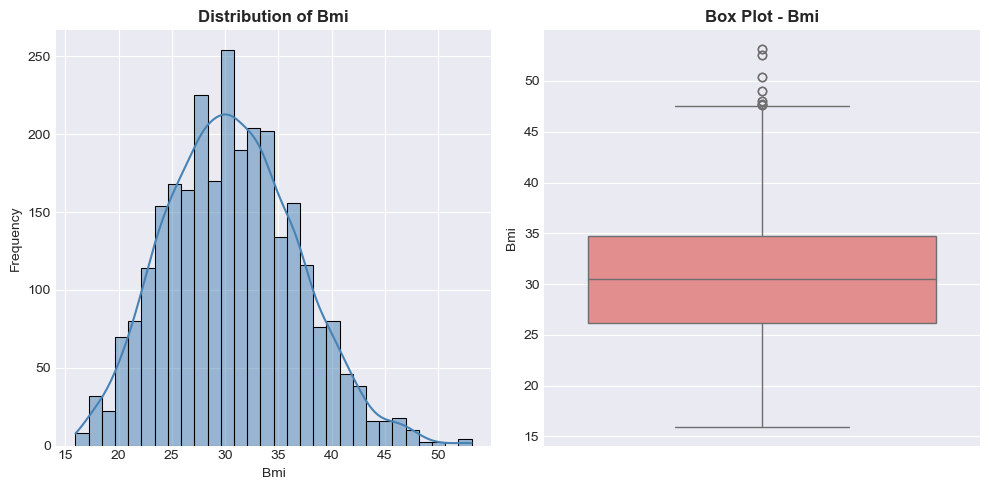

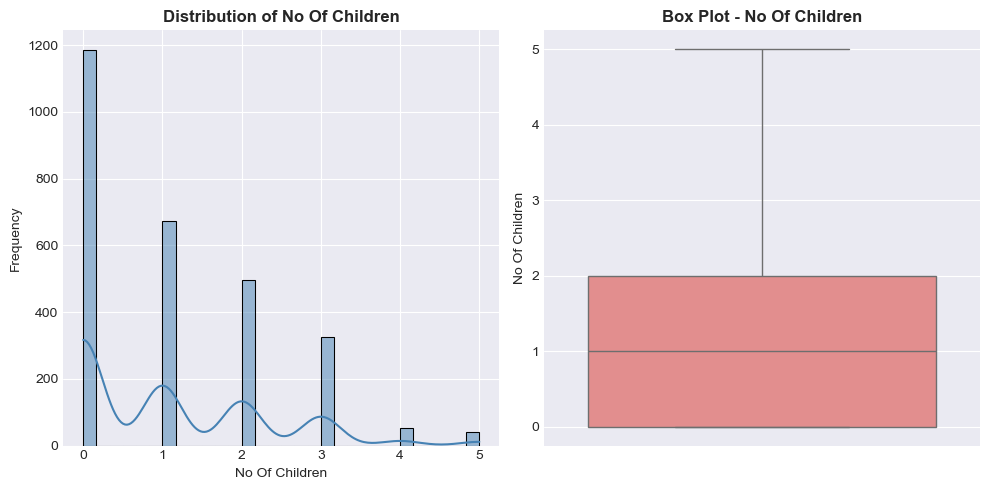

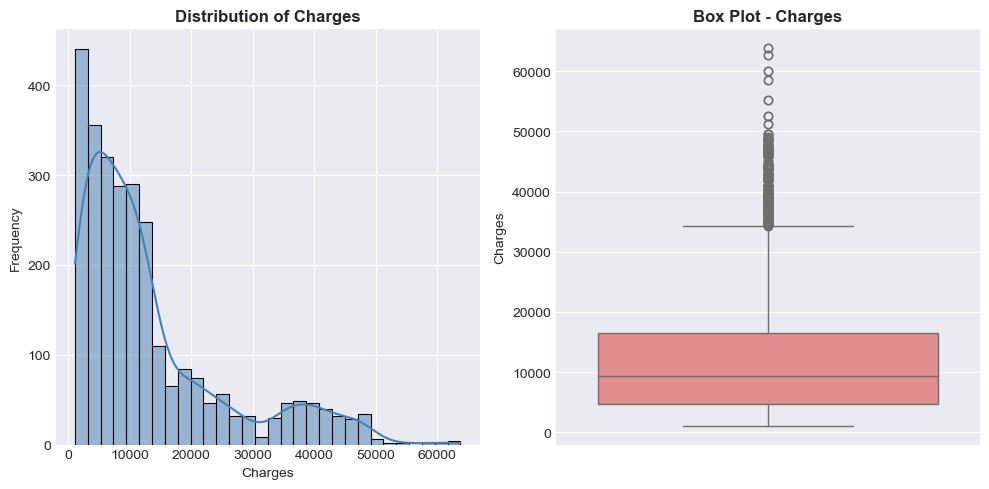

In [10]:
# Visualize distributions of numerical features
numeric_features = ['age', 'bmi', 'no_of_children', 'charges']

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    
    # Box plot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Box Plot - {feature.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    plt.ylabel(feature.replace("_", " ").title())
    
    plt.tight_layout()
    plt.show()

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\3019244621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, palette='Set2')


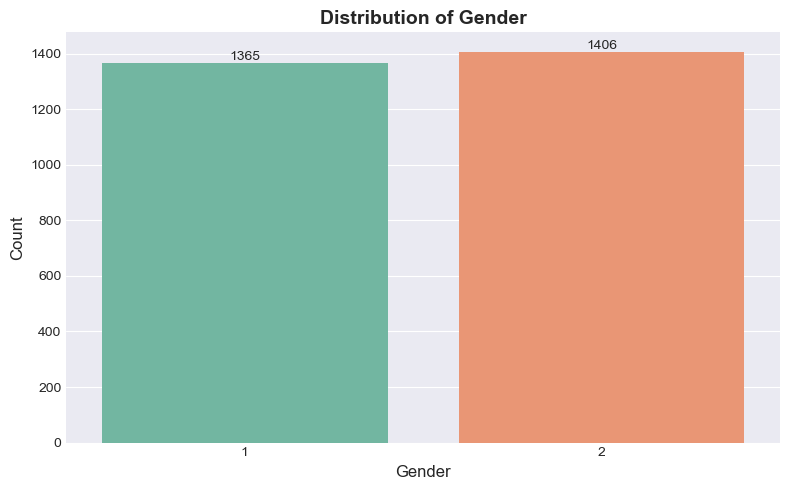

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\3019244621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, palette='Set2')


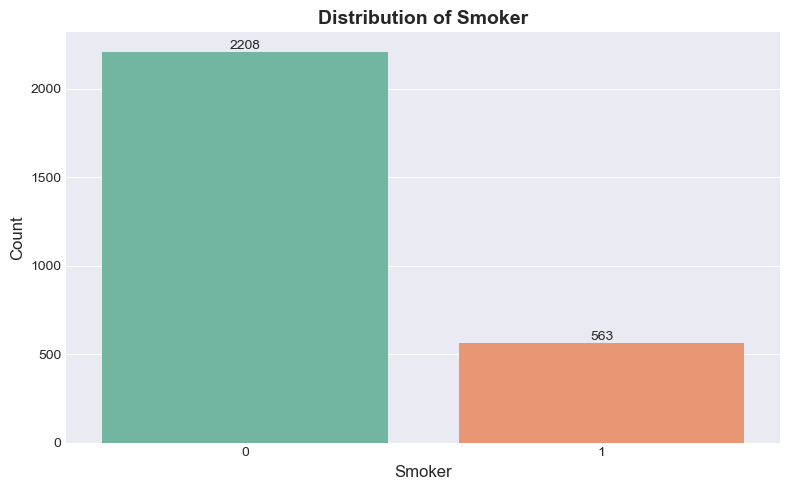

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\3019244621.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, palette='Set2')


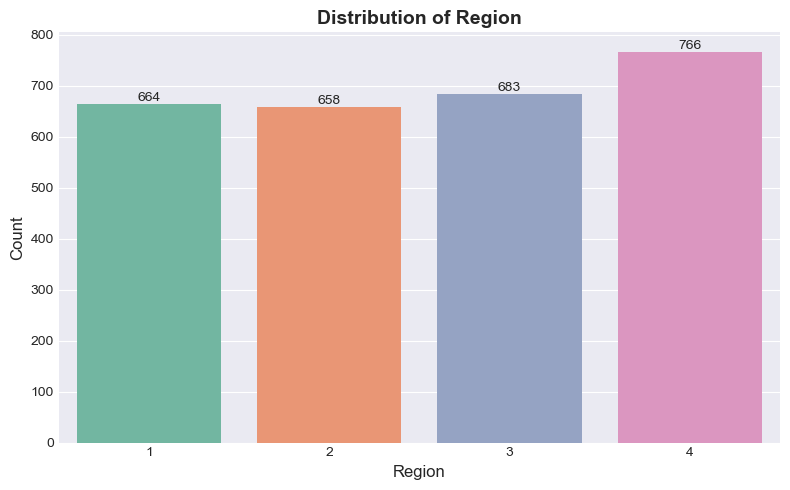

In [11]:
# Visualize distributions of categorical features
categorical_features = ['gender', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    
    # Count plot with annotations
    ax = sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    
    plt.tight_layout()
    plt.show()

### 3.3 Feature Relationship Analysis

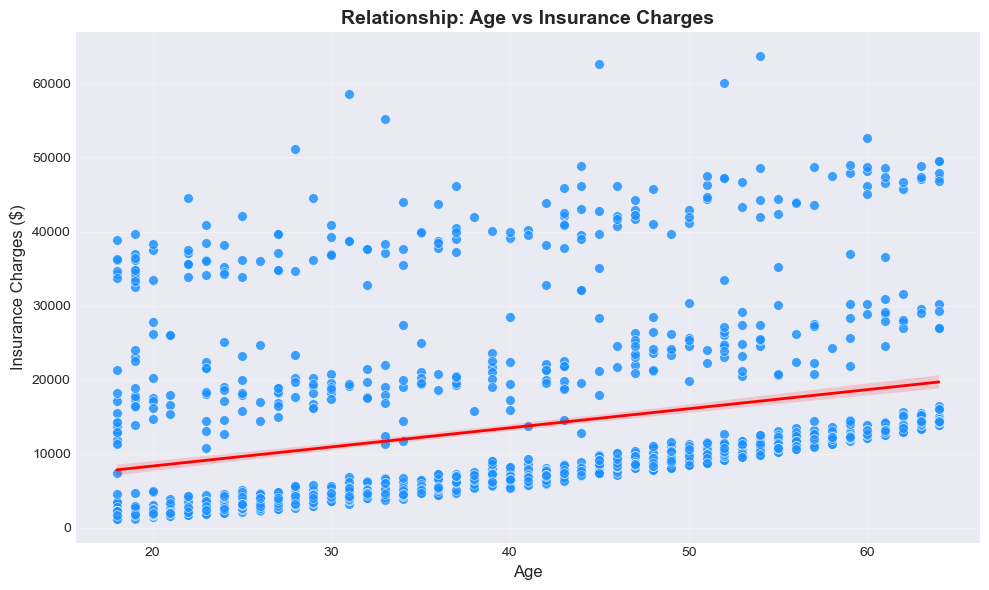

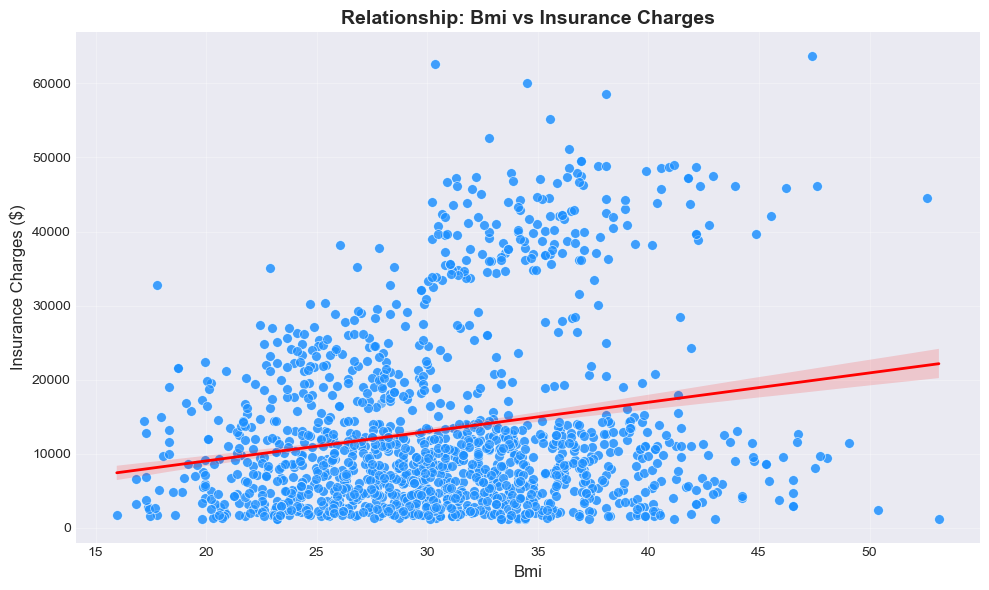

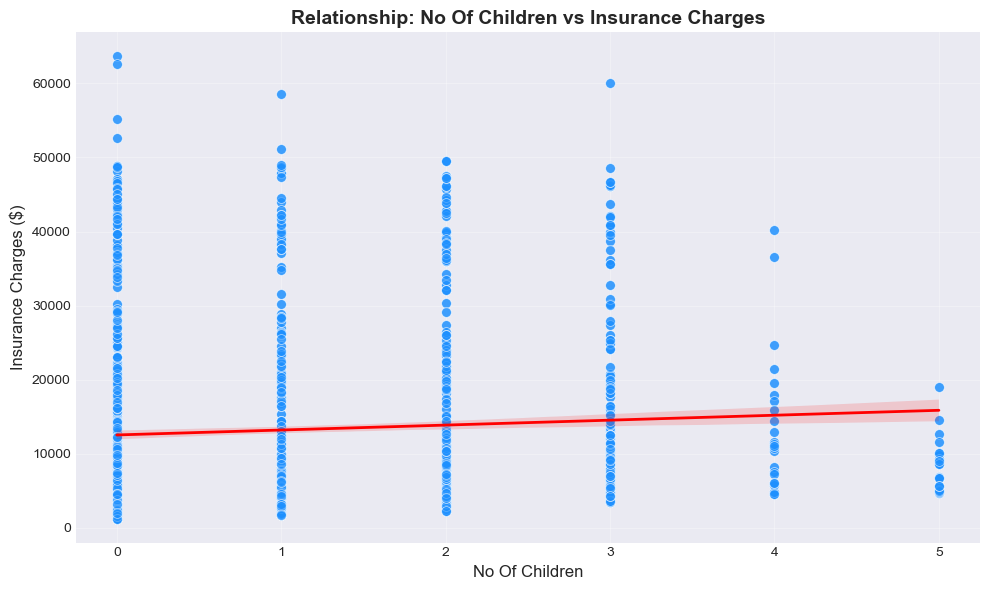

In [12]:
# Scatter plots: numerical features vs charges
numeric_predictors = ['age', 'bmi', 'no_of_children']

for feature in numeric_predictors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['charges'], alpha=0.6, s=50, color='dodgerblue')
    
    # Add regression line
    sns.regplot(x=df[feature], y=df['charges'], scatter=False, color='red', line_kws={'linewidth': 2})
    
    plt.title(f'Relationship: {feature.replace("_", " ").title()} vs Insurance Charges', 
              fontsize=14, fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Insurance Charges ($)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\1241907880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='Set3')


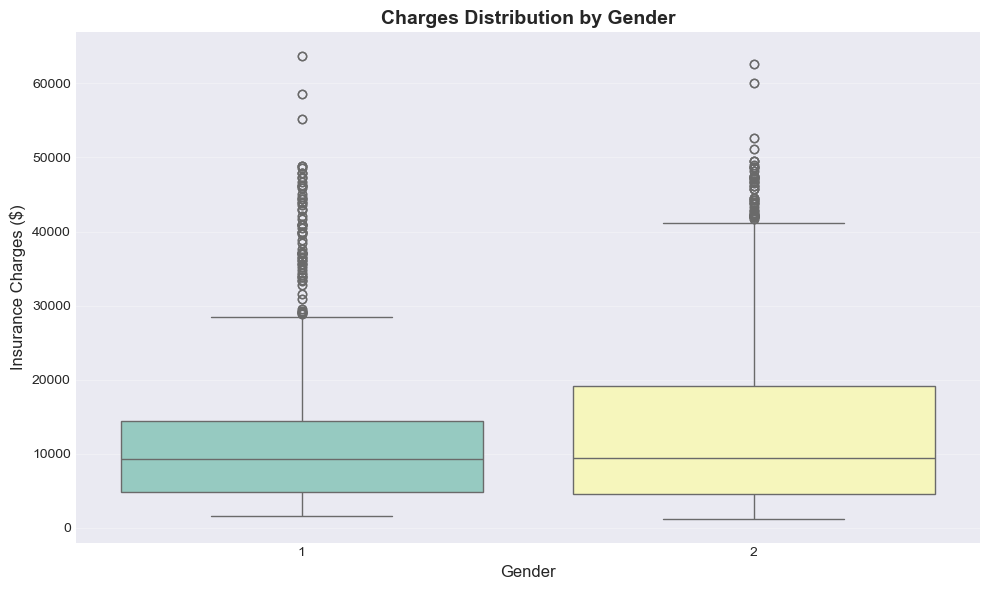

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\1241907880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='Set3')


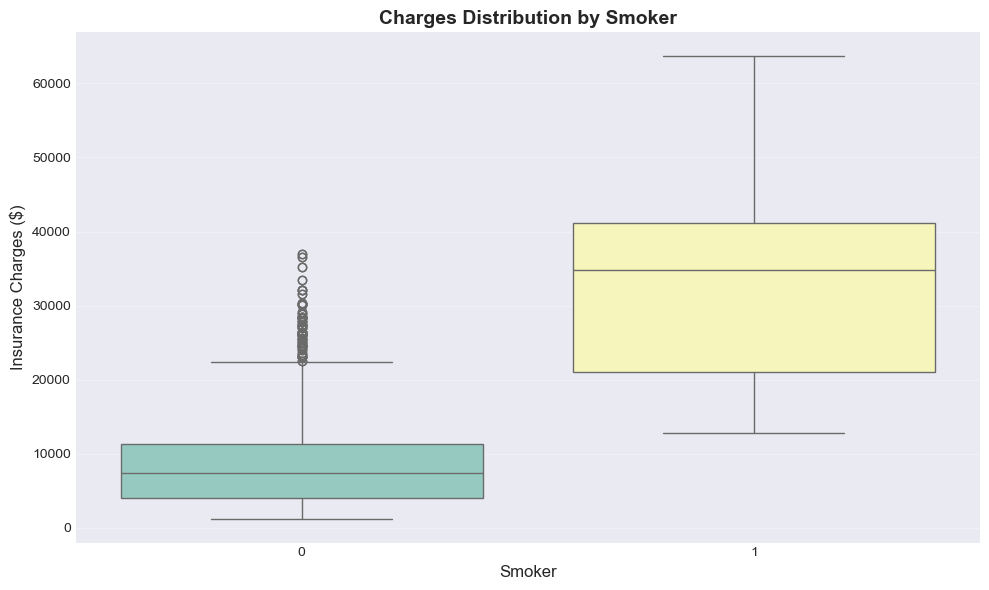

C:\Users\a12u\AppData\Local\Temp\ipykernel_19952\1241907880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[feature], y=df['charges'], palette='Set3')


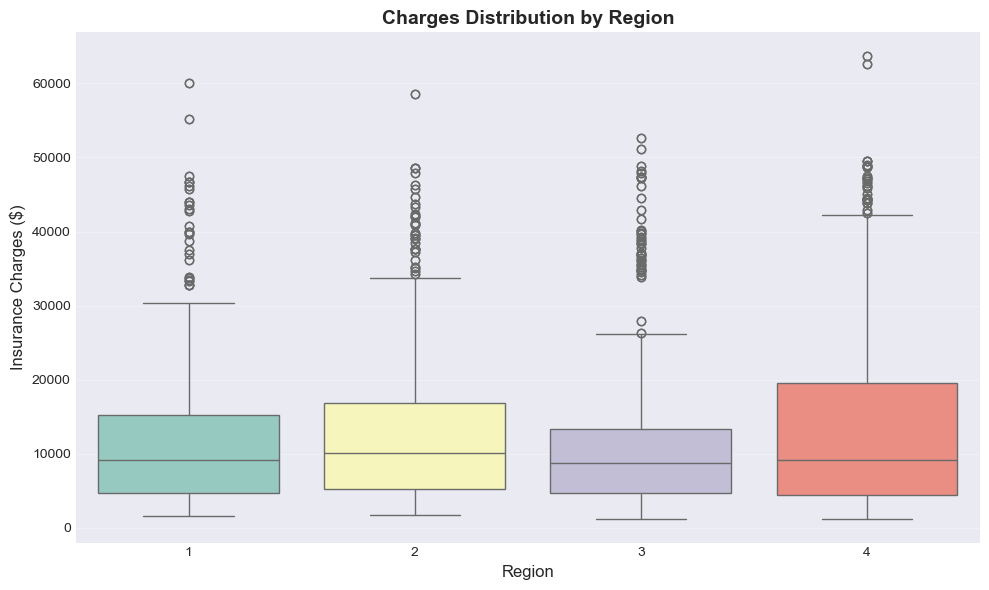

In [13]:
# Box plots: categorical features vs charges
categorical_predictors = ['gender', 'smoker', 'region']

for feature in categorical_predictors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], y=df['charges'], palette='Set3')
    
    plt.title(f'Charges Distribution by {feature.replace("_", " ").title()}', 
              fontsize=14, fontweight='bold')
    plt.xlabel(feature.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Insurance Charges ($)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 3.4 Correlation Analysis

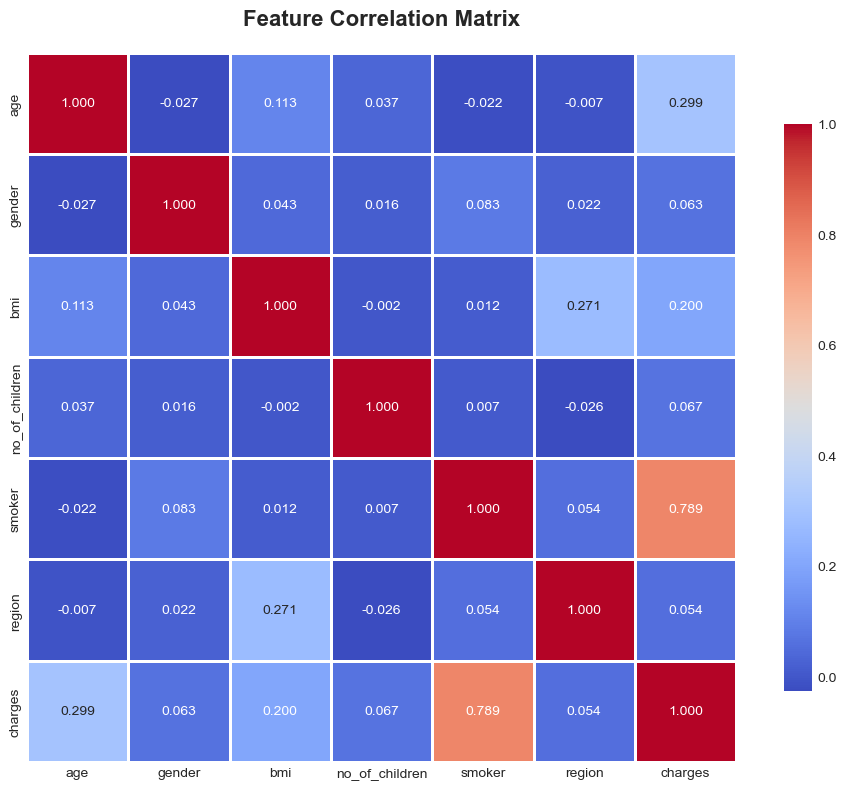


Correlations with Insurance Charges:
charges           1.00
smoker            0.79
age               0.30
bmi               0.20
no_of_children    0.07
gender            0.06
region            0.05
Name: charges, dtype: float64


In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations with charges
print("\nCorrelations with Insurance Charges:")
print(correlation_matrix['charges'].sort_values(ascending=False))

## 4. Model Development

In [15]:
# Prepare feature matrix (X) and target variable (y)
X = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df['charges']

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Variable Shape: {y.shape}")

Feature Matrix Shape: (2771, 6)
Target Variable Shape: (2771,)


In [16]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

Training Set Size: 2216 samples
Testing Set Size: 555 samples


### 4.1 Simple Linear Regression (Single Feature)

In [17]:
# Use BMI as the single predictor (based on correlation analysis)
X_bmi_train = X_train[['bmi']]
X_bmi_test = X_test[['bmi']]

# Initialize and train the model
model_simple_lr = LinearRegression()
model_simple_lr.fit(X_bmi_train, y_train)

# Generate predictions
y_pred_simple = model_simple_lr.predict(X_bmi_test)

# Evaluate model performance
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("="*60)
print("Simple Linear Regression (BMI only)")
print("="*60)
print(f"Mean Squared Error (MSE):       ${mse_simple:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_simple:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_simple:,.2f}")
print(f"R² Score:                        {r2_simple:.4f}")
print(f"Model Coefficient (BMI):         {model_simple_lr.coef_[0]:.2f}")
print(f"Model Intercept:                 ${model_simple_lr.intercept_:,.2f}")

Simple Linear Regression (BMI only)
Mean Squared Error (MSE):       $153,463,793.45
Root Mean Squared Error (RMSE): $12,388.05
Mean Absolute Error (MAE):      $9,352.10
R² Score:                        0.0594
Model Coefficient (BMI):         362.76
Model Intercept:                 $2,025.45


### 4.2 Multiple Linear Regression

In [18]:
# Initialize and train the model using all features
model_multi_lr = LinearRegression()
model_multi_lr.fit(X_train, y_train)

# Generate predictions
y_pred_multi = model_multi_lr.predict(X_test)

# Evaluate model performance
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("="*60)
print("Multiple Linear Regression (All Features)")
print("="*60)
print(f"Mean Squared Error (MSE):       ${mse_multi:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_multi:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_multi:,.2f}")
print(f"R² Score:                        {r2_multi:.4f}")
print(f"\nFeature Coefficients:")
for feature, coef in zip(X.columns, model_multi_lr.coef_):
    print(f"  {feature:20s}: {coef:>10.2f}")

Multiple Linear Regression (All Features)
Mean Squared Error (MSE):       $36,317,199.50
Root Mean Squared Error (RMSE): $6,026.38
Mean Absolute Error (MAE):      $4,061.80
R² Score:                        0.7774

Feature Coefficients:
  age                 :     259.07
  gender              :     -74.95
  bmi                 :     322.94
  no_of_children      :     511.08
  smoker              :   23637.63
  region              :    -391.65


### 4.3 Ridge Regression (L2 Regularization)

In [19]:
# Initialize and train Ridge regression model with regularization
model_ridge = Ridge(alpha=1.0)  # Alpha controls regularization strength
model_ridge.fit(X_train, y_train)

# Generate predictions
y_pred_ridge = model_ridge.predict(X_test)

# Evaluate model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("="*60)
print("Ridge Regression (L2 Regularization, alpha=1.0)")
print("="*60)
print(f"Mean Squared Error (MSE):       ${mse_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_ridge:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_ridge:,.2f}")
print(f"R² Score:                        {r2_ridge:.4f}")
print(f"\nFeature Coefficients:")
for feature, coef in zip(X.columns, model_ridge.coef_):
    print(f"  {feature:20s}: {coef:>10.2f}")

Ridge Regression (L2 Regularization, alpha=1.0)
Mean Squared Error (MSE):       $36,358,983.78
Root Mean Squared Error (RMSE): $6,029.84
Mean Absolute Error (MAE):      $4,067.73
R² Score:                        0.7771

Feature Coefficients:
  age                 :     259.05
  gender              :     -71.20
  bmi                 :     322.85
  no_of_children      :     510.95
  smoker              :   23570.89
  region              :    -390.50


### 4.4 Model Comparison

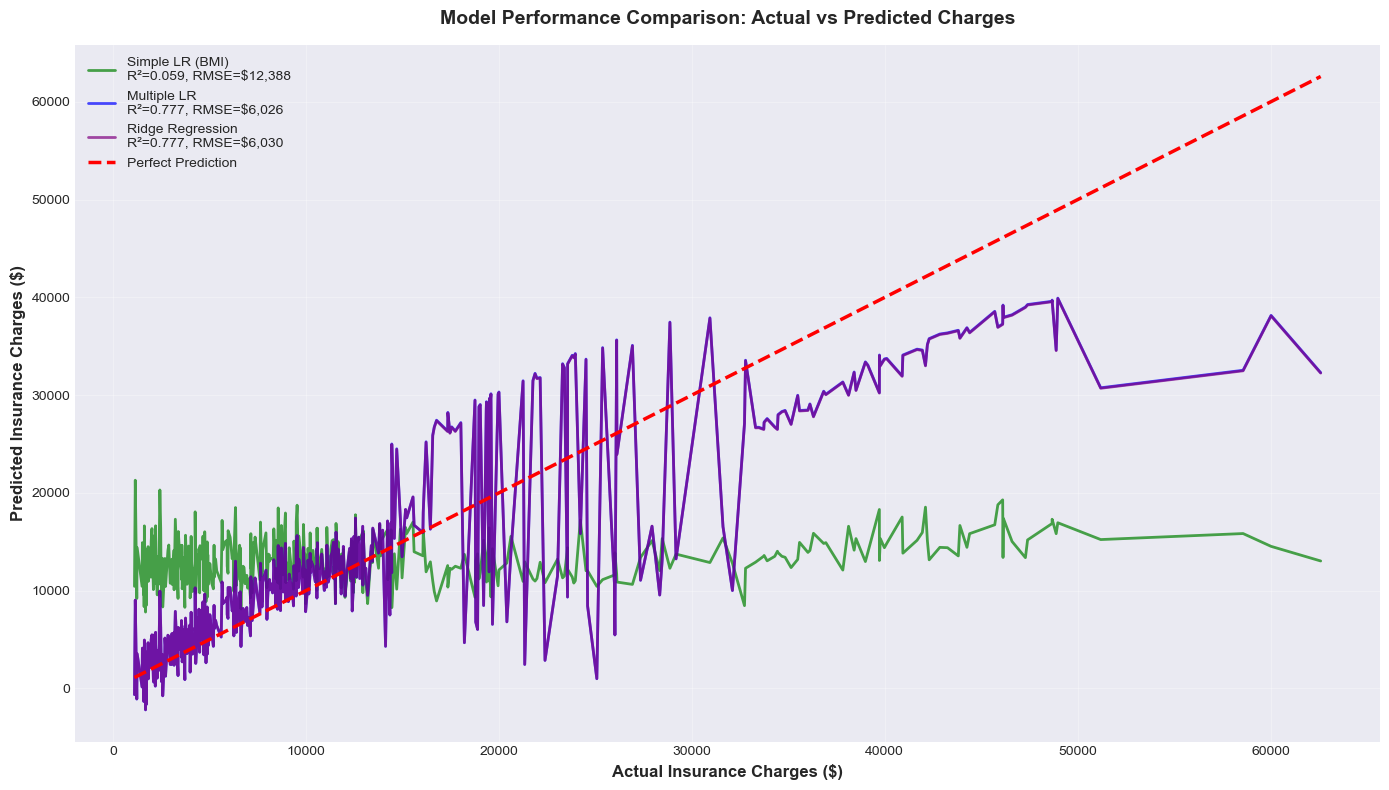


                         MODEL PERFORMANCE SUMMARY
Model                                RMSE             MAE        R² Score
--------------------------------------------------------------------------------
Simple LR (BMI only)      $     12,388.05 $      9,352.10         0.0594
Multiple LR               $      6,026.38 $      4,061.80         0.7774
Ridge Regression          $      6,029.84 $      4,067.73         0.7771


In [20]:
# Visualize model performance comparison
plt.figure(figsize=(14, 8))

# Sort test data by actual charges for better visualization
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices].values
y_simple_sorted = y_pred_simple[sorted_indices]
y_multi_sorted = y_pred_multi[sorted_indices]
y_ridge_sorted = y_pred_ridge[sorted_indices]

# Plot predictions from all models
plt.plot(y_test_sorted, y_simple_sorted, 
         color='green', linewidth=2, alpha=0.7, 
         label=f'Simple LR (BMI)\nR²={r2_simple:.3f}, RMSE=${rmse_simple:,.0f}')

plt.plot(y_test_sorted, y_multi_sorted, 
         color='blue', linewidth=2, alpha=0.7,
         label=f'Multiple LR\nR²={r2_multi:.3f}, RMSE=${rmse_multi:,.0f}')

plt.plot(y_test_sorted, y_ridge_sorted, 
         color='purple', linewidth=2, alpha=0.7,
         label=f'Ridge Regression\nR²={r2_ridge:.3f}, RMSE=${rmse_ridge:,.0f}')

# Perfect prediction reference line
plt.plot(y_test_sorted, y_test_sorted, 
         color='red', linestyle='--', linewidth=2.5, 
         label='Perfect Prediction')

# Formatting
plt.xlabel("Actual Insurance Charges ($)", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Insurance Charges ($)", fontsize=12, fontweight='bold')
plt.title("Model Performance Comparison: Actual vs Predicted Charges", 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*80)
print(" "*25 + "MODEL PERFORMANCE SUMMARY")
print("="*80)
print(f"{'Model':<25} {'RMSE':>15} {'MAE':>15} {'R² Score':>15}")
print("-"*80)
print(f"{'Simple LR (BMI only)':<25} ${rmse_simple:>14,.2f} ${mae_simple:>14,.2f} {r2_simple:>14.4f}")
print(f"{'Multiple LR':<25} ${rmse_multi:>14,.2f} ${mae_multi:>14,.2f} {r2_multi:>14.4f}")
print(f"{'Ridge Regression':<25} ${rmse_ridge:>14,.2f} ${mae_ridge:>14,.2f} {r2_ridge:>14.4f}")
print("="*80)

## 5. Model Refinement and Optimization

### 5.1 Ridge Regression Hyperparameter Tuning

In [21]:
# Test different alpha values for Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuning_results = []

print("="*70)
print("Ridge Regression Hyperparameter Tuning (Alpha Values)")
print("="*70)
print(f"{'Alpha':>10} {'RMSE':>15} {'MAE':>15} {'R² Score':>15}")
print("-"*70)

for alpha in alpha_values:
    # Train model with current alpha
    ridge_tuned = Ridge(alpha=alpha)
    ridge_tuned.fit(X_train, y_train)
    
    # Predictions and evaluation
    y_pred = ridge_tuned.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    tuning_results.append({'alpha': alpha, 'rmse': rmse, 'mae': mae, 'r2': r2})
    print(f"{alpha:>10.3f} ${rmse:>14,.2f} ${mae:>14,.2f} {r2:>14.4f}")

# Find best alpha
best_result = min(tuning_results, key=lambda x: x['rmse'])
print("="*70)
print(f"✓ Best Alpha: {best_result['alpha']} (RMSE: ${best_result['rmse']:,.2f}, R²: {best_result['r2']:.4f})")
print("="*70)

Ridge Regression Hyperparameter Tuning (Alpha Values)
     Alpha            RMSE             MAE        R² Score
----------------------------------------------------------------------
     0.001 $      6,026.38 $      4,061.80         0.7774
     0.010 $      6,026.41 $      4,061.85         0.7774
     0.100 $      6,026.72 $      4,062.39         0.7774
     1.000 $      6,029.84 $      4,067.73         0.7771
    10.000 $      6,065.24 $      4,122.43         0.7745
   100.000 $      6,632.78 $      4,665.56         0.7304
  1000.000 $      9,876.21 $      7,340.06         0.4022
✓ Best Alpha: 0.001 (RMSE: $6,026.38, R²: 0.7774)


### 5.2 Polynomial Feature Engineering

In [22]:
# Create polynomial features (degree 2)
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

print(f"Original Feature Count: {X_train.shape[1]}")
print(f"Polynomial Feature Count (degree=2): {X_train_poly.shape[1]}")
print(f"Feature names sample: {poly_transformer.get_feature_names_out(X.columns)[:10]}")

# Train Ridge regression on polynomial features
model_poly_ridge = Ridge(alpha=1.0)
model_poly_ridge.fit(X_train_poly, y_train)

# Generate predictions
y_pred_poly = model_poly_ridge.predict(X_test_poly)

# Evaluate performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\n" + "="*60)
print("Polynomial Ridge Regression (Degree 2, Alpha=1.0)")
print("="*60)
print(f"Mean Squared Error (MSE):       ${mse_poly:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_poly:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_poly:,.2f}")
print(f"R² Score:                        {r2_poly:.4f}")
print("="*60)

Original Feature Count: 6
Polynomial Feature Count (degree=2): 27
Feature names sample: ['age' 'gender' 'bmi' 'no_of_children' 'smoker' 'region' 'age^2'
 'age gender' 'age bmi' 'age no_of_children']

Polynomial Ridge Regression (Degree 2, Alpha=1.0)
Mean Squared Error (MSE):       $24,841,351.48
Root Mean Squared Error (RMSE): $4,984.11
Mean Absolute Error (MAE):      $2,958.10
R² Score:                        0.8477


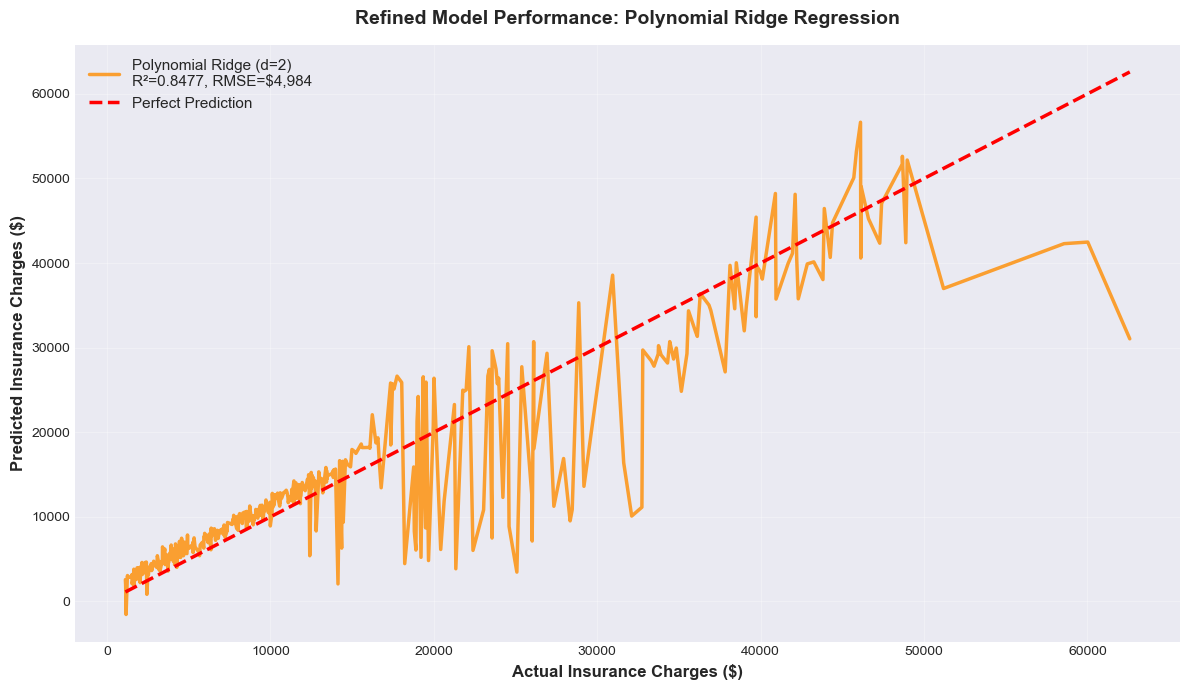


MODEL IMPROVEMENT ANALYSIS
Metric                         Ridge                Poly Ridge           Change         
----------------------------------------------------------------------
RMSE                           $6,029.84            $4,984.11                   -17.34%
MAE                            $4,067.73            $2,958.10                   -27.28%
R² Score                       0.7771               0.8477                        9.08%


In [23]:
# Visualize refined model performance
plt.figure(figsize=(12, 7))

# Sort for better visualization
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices].values
y_poly_sorted = y_pred_poly[sorted_indices]

# Plot polynomial model predictions
plt.plot(y_test_sorted, y_poly_sorted, 
         color='darkorange', linewidth=2.5, alpha=0.8,
         label=f'Polynomial Ridge (d=2)\nR²={r2_poly:.4f}, RMSE=${rmse_poly:,.0f}')

# Perfect prediction reference
plt.plot(y_test_sorted, y_test_sorted, 
         color='red', linestyle='--', linewidth=2.5, 
         label='Perfect Prediction')

# Formatting
plt.xlabel("Actual Insurance Charges ($)", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Insurance Charges ($)", fontsize=12, fontweight='bold')
plt.title("Refined Model Performance: Polynomial Ridge Regression", 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Improvement comparison
print("\n" + "="*70)
print("MODEL IMPROVEMENT ANALYSIS")
print("="*70)
print(f"{'Metric':<30} {'Ridge':<20} {'Poly Ridge':<20} {'Change':<15}")
print("-"*70)
print(f"{'RMSE':<30} ${rmse_ridge:<19,.2f} ${rmse_poly:<19,.2f} {((rmse_poly - rmse_ridge)/rmse_ridge)*100:>13.2f}%")
print(f"{'MAE':<30} ${mae_ridge:<19,.2f} ${mae_poly:<19,.2f} {((mae_poly - mae_ridge)/mae_ridge)*100:>13.2f}%")
print(f"{'R² Score':<30} {r2_ridge:<20.4f} {r2_poly:<20.4f} {((r2_poly - r2_ridge)/r2_ridge)*100:>13.2f}%")
print("="*70)

## 6. Conclusions and Key Insights

### Main Findings

1. **Smoking Status - Primary Cost Driver**
   - Smoker status emerged as the strongest predictor of insurance charges
   - Smokers face significantly higher insurance premiums compared to non-smokers
   - This categorical feature alone explains a substantial portion of cost variance

2. **BMI and Age - Secondary Factors**
   - Body Mass Index (BMI) shows positive correlation with insurance costs
   - Age is directly proportional to charges, reflecting increased health risks
   - Combined with smoking status, these factors substantially impact premiums

3. **Model Performance Comparison**
   - **Simple Linear Regression (BMI only)**: Limited predictive power due to single feature
   - **Multiple Linear Regression**: Significant improvement using all features
   - **Ridge Regression**: Comparable performance with regularization benefits
   - **Polynomial Ridge**: Best overall performance with non-linear feature interactions

4. **Model Optimization Results**
   - Hyperparameter tuning improved Ridge regression stability
   - Polynomial features (degree 2) captured non-linear relationships effectively
   - Regularization prevented overfitting while maintaining predictive accuracy

### Business Implications

- **Insurance Pricing**: Actuarial models can leverage these insights for risk-based premium calculation
- **Risk Assessment**: Smoking status should be weighted heavily in underwriting decisions
- **Preventive Programs**: Targeting smoking cessation and BMI management could reduce claim costs
- **Data-Driven Decisions**: Machine learning models enable more accurate charge predictions

### Future Enhancements

- Incorporate additional features (medical history, lifestyle factors)
- Explore ensemble methods (Random Forest, Gradient Boosting)
- Implement cross-validation for robust model evaluation
- Deploy model as a web service for real-time predictions

---

**Project Status**: ✅ Complete  
**Best Model**: Polynomial Ridge Regression (Degree 2, Alpha=1.0)  

---

**Author**: Visura Rodrigo  
**Project**: Medical Insurance Charges Analysis  
**Tools**: Python, Pandas, Scikit-learn, Matplotlib, Seaborn